In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipyparallel import Client

The Client object provides a contect to interact with the engines in our IPython cluster

In [3]:
c = Client()

Each engine is another python interpreter.  Names spaces have to be managed explicitly. 
How to import to all engines:

In [4]:
with c[:].sync_imports():
    import numpy

importing numpy on engine(s)


Execution on the engines defaults to "non-blocking" or asynchronous behaviour

In [31]:
c.block = False

This call returns immediately ... 

In [32]:
%timeit c[:].execute("a = numpy.arange(0,1e7,0.1)")

100 loops, best of 3: 3.36 ms per loop


Now let's force it to complete before returning ... 

In [33]:
c.block = True

In [36]:
%timeit c[:].execute("a = numpy.arange(0,1e7,0.1)")

1 loop, best of 3: 537 ms per loop


The parallel "magic" allows commands to be executed on all engines

In [5]:
%px a = numpy.arange(0,10,0.1)

Since engines are IPython as well, you can even run magics remotely

In [6]:
%px %pylab inline

[stdout:0] Populating the interactive namespace from numpy and matplotlib
[stdout:1] Populating the interactive namespace from numpy and matplotlib
[stdout:2] Populating the interactive namespace from numpy and matplotlib
[stdout:3] Populating the interactive namespace from numpy and matplotlib
[stdout:4] Populating the interactive namespace from numpy and matplotlib
[stdout:5] Populating the interactive namespace from numpy and matplotlib
[stdout:6] Populating the interactive namespace from numpy and matplotlib
[stdout:7] Populating the interactive namespace from numpy and matplotlib
[stdout:8] Populating the interactive namespace from numpy and matplotlib
[stdout:9] Populating the interactive namespace from numpy and matplotlib
[stdout:10] Populating the interactive namespace from numpy and matplotlib
[stdout:11] Populating the interactive namespace from numpy and matplotlib
[stdout:12] Populating the interactive namespace from numpy and matplotlib
[stdout:13] Populating the interact

[output:0]

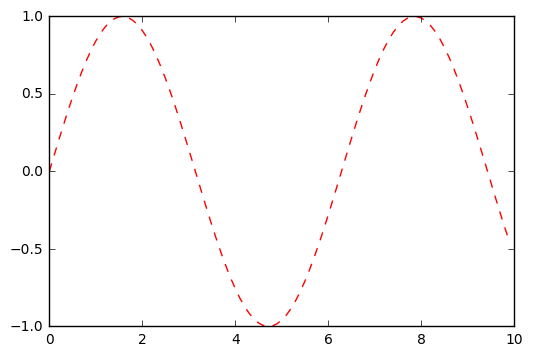

[output:1]

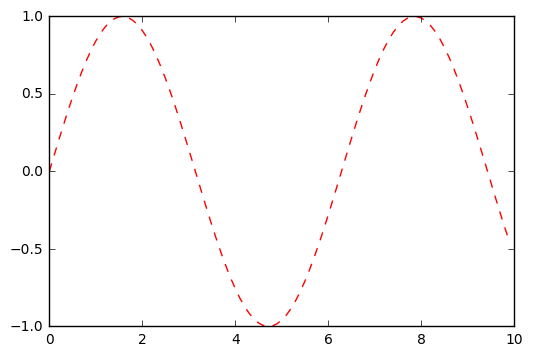

[output:2]

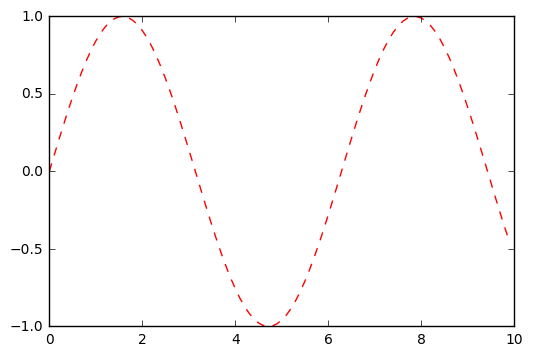

[output:3]

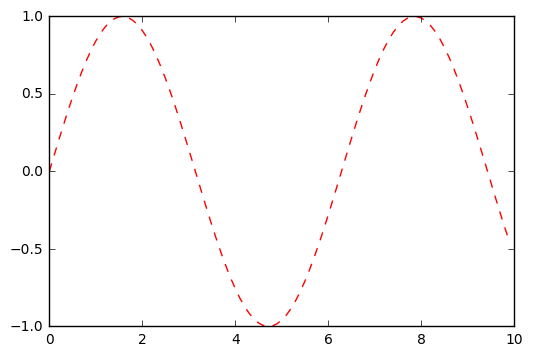

[output:4]

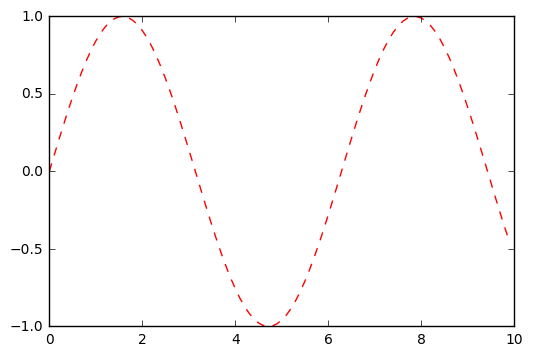

[output:5]

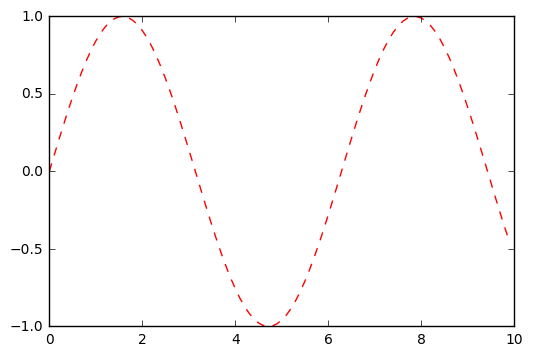

[output:6]

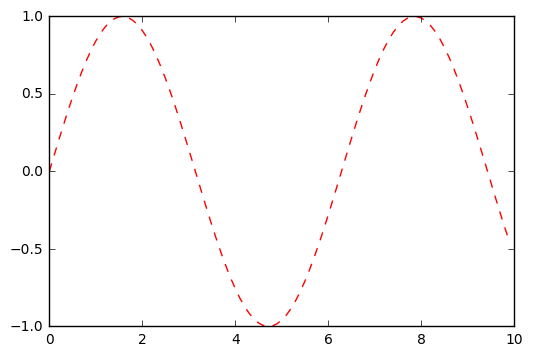

[output:7]

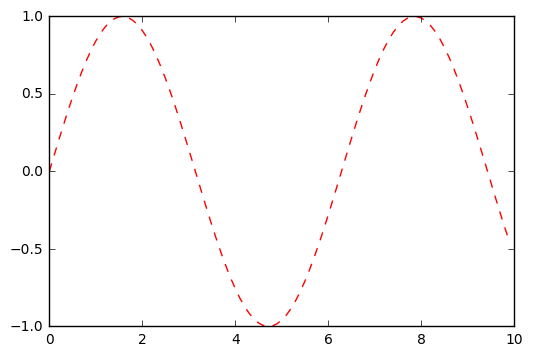

[output:8]

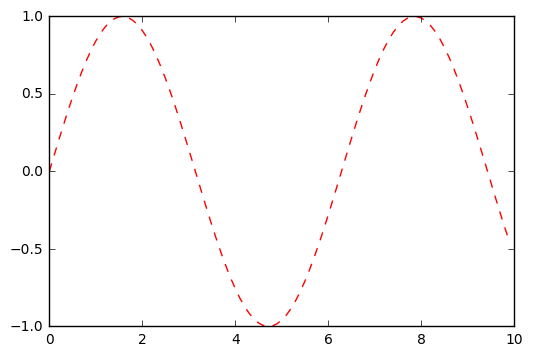

[output:9]

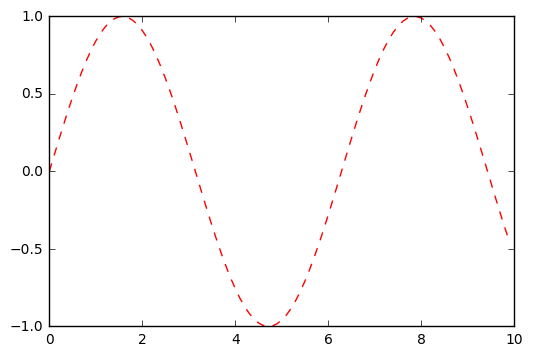

[output:10]

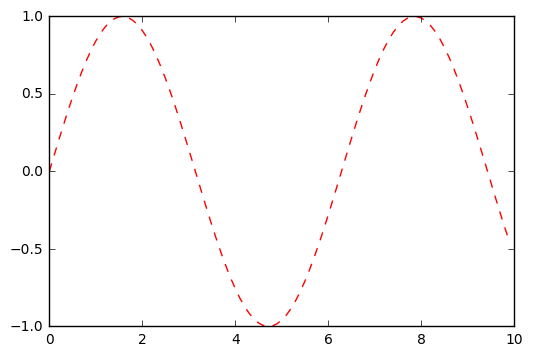

[output:11]

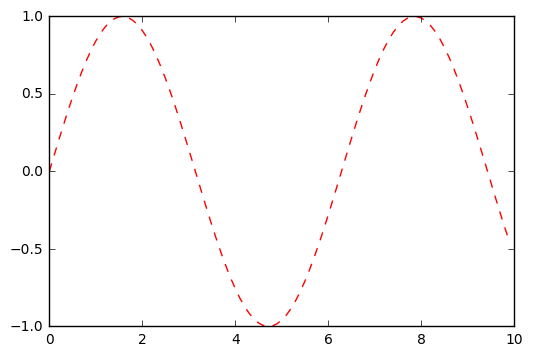

[output:12]

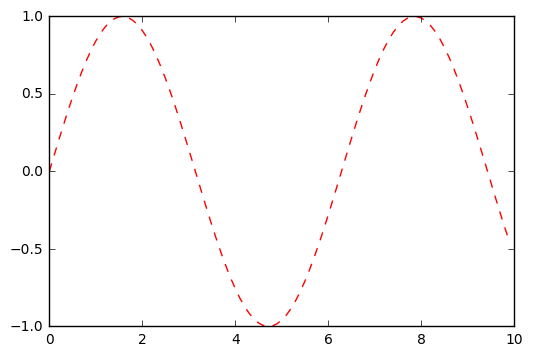

[output:13]

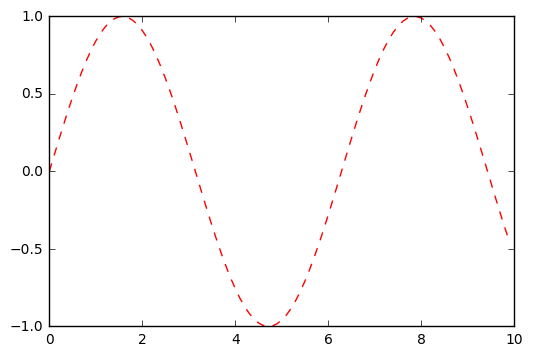

[output:14]

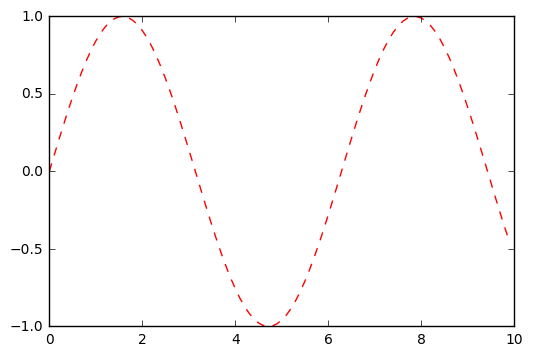

[output:15]

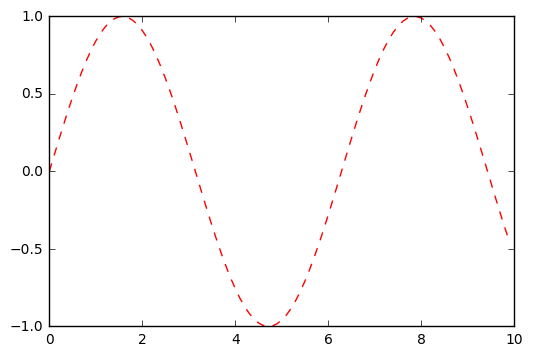

[output:16]

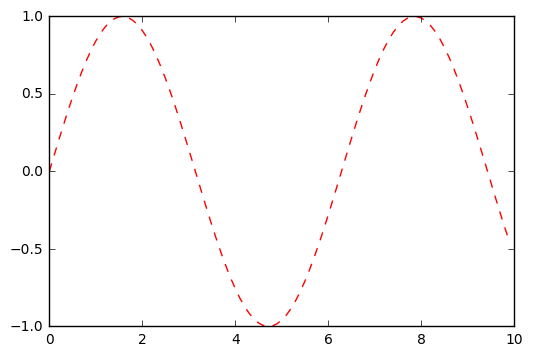

[output:17]

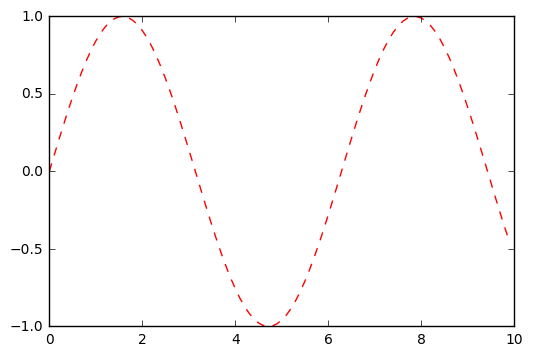

Out[0:10]: [<matplotlib.lines.Line2D at 0x2b10ac4e2e80>]

Out[1:10]: [<matplotlib.lines.Line2D at 0x2adc7069d438>]

Out[2:10]: [<matplotlib.lines.Line2D at 0x2b73b875d400>]

Out[3:10]: [<matplotlib.lines.Line2D at 0x2adf9266e240>]

Out[4:10]: [<matplotlib.lines.Line2D at 0x2b118486e0b8>]

Out[5:10]: [<matplotlib.lines.Line2D at 0x2adace0bddd8>]

Out[6:10]: [<matplotlib.lines.Line2D at 0x2ab0d37eff60>]

Out[7:10]: [<matplotlib.lines.Line2D at 0x2b194563add8>]

Out[8:10]: [<matplotlib.lines.Line2D at 0x2b45afc43dd8>]

Out[9:10]: [<matplotlib.lines.Line2D at 0x2b1713860390>]

Out[10:10]: [<matplotlib.lines.Line2D at 0x2b8472080ef0>]

Out[11:10]: [<matplotlib.lines.Line2D at 0x2b8beddeaf28>]

Out[12:10]: [<matplotlib.lines.Line2D at 0x2b1eb58aa438>]

Out[13:10]: [<matplotlib.lines.Line2D at 0x2b9f2bc12390>]

Out[14:10]: [<matplotlib.lines.Line2D at 0x2b96eec48f28>]

Out[15:10]: [<matplotlib.lines.Line2D at 0x2b0289cb4dd8>]

Out[16:10]: [<matplotlib.lines.Line2D at 0x2af39816c390>]

Out[17:10]: [<matplotlib.lines.Line2D at 0x2abf779fa390>]

In [7]:
%px plot(a,sin(a),'r--')

In [8]:
%px print(a)

[stdout:0] 
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9]
[stdout:1] 
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
  9.   9.1  